In [3]:
#Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


from imblearn.over_sampling import SMOTE

In [4]:
#Load Dataset 
print("Loading dataset...")
data = pd.read_csv("creditcard.csv")
print("Dataset shape:", data.shape)
data.head()

Loading dataset...
Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class distribution:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


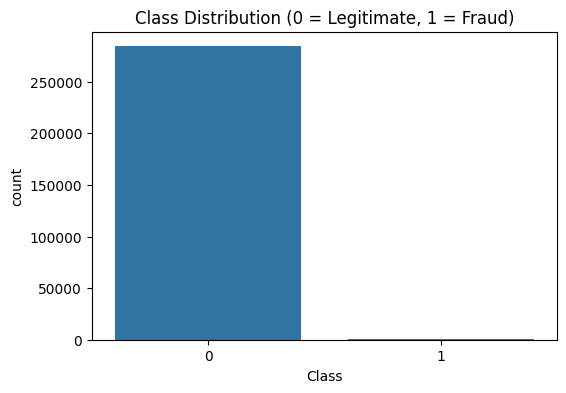

In [5]:
#Explore Class Imbalance
print("Class distribution:")
print(data['Class'].value_counts(normalize=True))


plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (0 = Legitimate, 1 = Fraud)")
plt.show()

In [6]:
#Split Features and Labels
X = data.drop("Class", axis=1)
y = data["Class"]


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, stratify=y, random_state=42
)


print("Before SMOTE:")
print(y_train.value_counts())

Before SMOTE:
Class
0    227451
1       394
Name: count, dtype: int64


In [7]:
#Handle Imbalance with SMOTE 
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


print("After SMOTE:")
print(y_train_res.value_counts())

After SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


In [8]:
# Train Random Forest
rf = RandomForestClassifier(
n_estimators=200,
class_weight="balanced",
random_state=42,
n_jobs=-1
)


rf.fit(X_train_res, y_train_res)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.999403110845827
Precision: 0.826530612244898
Recall: 0.826530612244898
F1 Score: 0.826530612244898

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



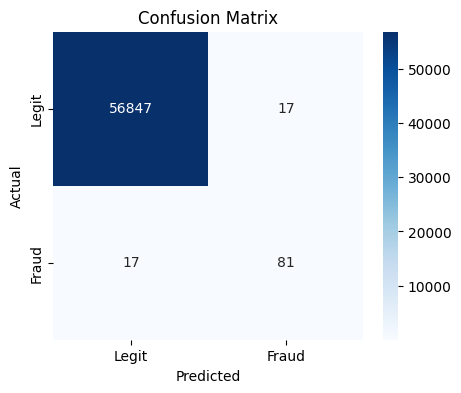

In [14]:
# Evaluate Model 
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit','Fraud'], yticklabels=['Legit','Fraud'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

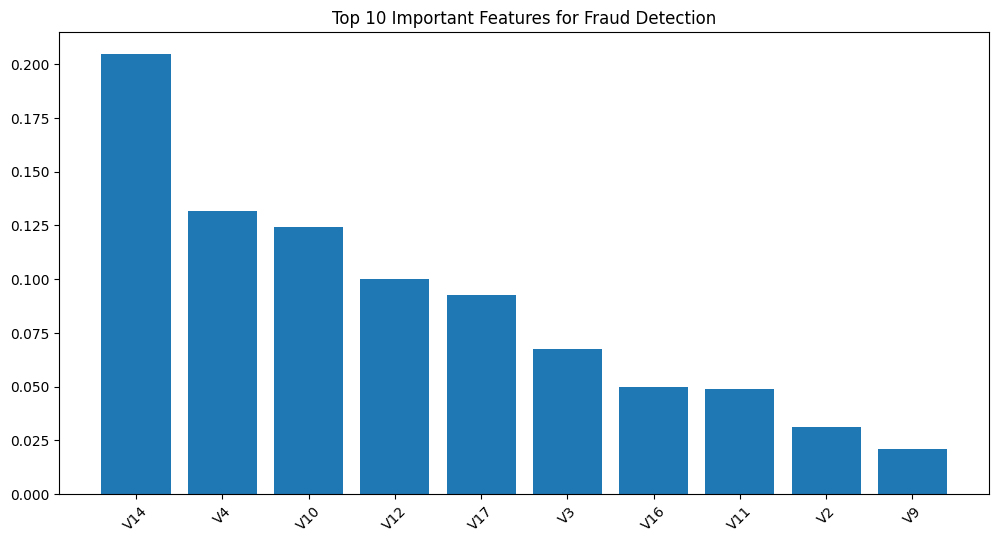

Top 10 Features:
V14: 0.2047
V4: 0.1318
V10: 0.1242
V12: 0.1002
V17: 0.0926
V3: 0.0677
V16: 0.0498
V11: 0.0491
V2: 0.0313
V9: 0.0210


In [16]:
# Feature Importance 
importances = rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(12,6))
plt.title("Top 10 Important Features for Fraud Detection")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [feat_names[i] for i in indices[:10]], rotation=45)
plt.show()


print("Top 10 Features:")
for i in range(10):
    print(f"{feat_names[indices[i]]}: {importances[indices[i]]:.4f}")